In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! pip install mudata
import mudata as md
from mudata import MuData
! pip install anndata
import anndata as ad

import torch
import numpy as np
import pandas as pd

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 3.6 MB/s eta 0:00:00


## import data

### brain

In [ ]:
# get data
data_prefix = 'drive/MyDrive/Work/multi-omics/brain/'
mdata = md.read(data_prefix+'mudata.h5mu', backed=False)
print(mdata)
# load train_val_test split for fairness
import pandas as pd
split = pd.read_csv(data_prefix+'train_val_test_split.csv')
print(split.head())

MuData object with n_obs × n_vars = 3143 × 110849
  obs:	'celltype'
  var:	'name', 'modality'
  2 modalities
    rna:	3143 x 15172
      obs:	'ID', 'rna_celltype', 'atac_celltype'
      var:	'name', 'modality'
    atac:	3143 x 95677
      obs:	'ID', 'rna_celltype', 'atac_celltype'
      var:	'name', 'modality'
   num_idx     is_train
0        0         test
1        1        train
2        2        train
3        3        train
4        4  iid_holdout


In [ ]:
train_indices = split[split['is_train'] == 'train']['num_idx'].values
train_indices

array([   1,    2,    3, ..., 3138, 3139, 3142])

In [ ]:
mdata = mdata[train_indices,:]
mdata

View of MuData object with n_obs × n_vars = 2515 × 110849
  obs:	'celltype'
  var:	'name', 'modality'
  2 modalities
    rna:	2515 x 15172
      obs:	'ID', 'rna_celltype', 'atac_celltype'
      var:	'name', 'modality'
    atac:	2515 x 95677
      obs:	'ID', 'rna_celltype', 'atac_celltype'
      var:	'name', 'modality'

### bone marrow

### gastrulation

In [ ]:
# get data
data_prefix = 'drive/MyDrive/Work/multi-omics/gastrulation/'
mdata = md.read(data_prefix+'mudata.h5mu', backed=False)
split = pd.read_csv(data_prefix+'train_val_test_split.csv')
train_indices = split[split['is_train'] == 'train']['num_idx'].values
mdata = mdata[train_indices,:]
mdata

# Cobolt

This model does not have prediction functions, so reconstruction can not be evaluated. I can only evaluate clustering

In [ ]:
! pip install git+https://github.com/epurdom/cobolt.git#egg=cobolt

  Cloning https://github.com/epurdom/cobolt.git to /tmp/pip-install-l0kgz2er/cobolt_ad0f54cc478e4e3e8fb28ed13434263e
  Running command git clone --filter=blob:none --quiet https://github.com/epurdom/cobolt.git /tmp/pip-install-l0kgz2er/cobolt_ad0f54cc478e4e3e8fb28ed13434263e
  Resolved https://github.com/epurdom/cobolt.git to commit cf5a448c6539025346a6393c215ba329cb3a0183
  Preparing metadata (setup.py) ... done
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_igraph-0.10.5-py3-none-any.whl (9.1 kB)
  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.4 MB/s eta 0:00:00
  Preparing metadata (setup

In [ ]:
#! pip install git+https://github.com/epurdom/cobolt.git#egg=cobolt

from cobolt.utils import SingleData, MultiomicDataset
from cobolt.model import Cobolt

## brain

### data prep

In [ ]:
rna = SingleData(feature_name='rna',
                 dataset_name='brain',
                 feature=mdata['rna'].var_names,
                 count=mdata['rna'].X,
                 barcode=mdata['rna'].obs_names)

In [ ]:
atac = SingleData(feature_name='atac',
                 dataset_name='brain',
                 feature=mdata['atac'].var_names,
                 count=mdata['atac'].X,
                 barcode=mdata['atac'].obs_names)

In [ ]:
multi_dt = MultiomicDataset.from_singledata(rna, atac)

### rs 0

In [ ]:
model = Cobolt(dataset=multi_dt, n_latent=20)

In [ ]:
model.train(num_epochs=100)

100%|██████████| 100/100 [1:06:42<00:00, 40.03s/it]


In [ ]:
model.calc_all_latent()
latent = model.get_all_latent()
latent

(array([[ 0.7740962 , -0.20343098, -1.231939  , ..., -1.177858  ,
          2.3702161 , -0.02110895],
        [-0.19872797,  1.5387957 , -1.5723984 , ...,  1.1738621 ,
         -0.3395935 ,  0.6186799 ],
        [-0.71716064, -0.852753  , -0.7934903 , ..., -0.9653031 ,
          0.99394345,  2.064256  ],
        ...,
        [ 2.1422603 , -0.34024546, -1.1798197 , ...,  2.9369807 ,
         -0.802717  , -0.3637294 ],
        [-0.44300288, -0.7599373 ,  3.1076176 , ...,  2.8350754 ,
         -0.82764995, -0.01621963],
        [ 1.4710057 ,  0.0082342 , -1.5726371 , ...,  3.1757472 ,
         -0.6674981 ,  2.2743235 ]], dtype=float32),
 array(['brain~AAACAGCCAGCTCATA-1', 'brain~AAACATGCACGTTACA-1',
        'brain~AAACATGCATAAACCT-1', ..., 'brain~TTTGTGGCACCAAAGG-1',
        'brain~TTTGTGGCAGTTATGT-1', 'brain~TTTGTTGGTTCAAGCA-1'],
       dtype='<U24'))

In [ ]:
latent[0].shape

(2515, 20)

In [ ]:
# save latents
np.save(data_prefix+'cobolt_latent_rs0', latent[0])

In [ ]:
# resolution in MultiVI was 1 I think
model.clustering(algo="leiden", resolution=1)
#clusters = model.get_clusters(algo="leiden", resolution=1.)

Running Leiden clustering algorithm with resolution 1.000.


Running UMAP with latent variable correction.


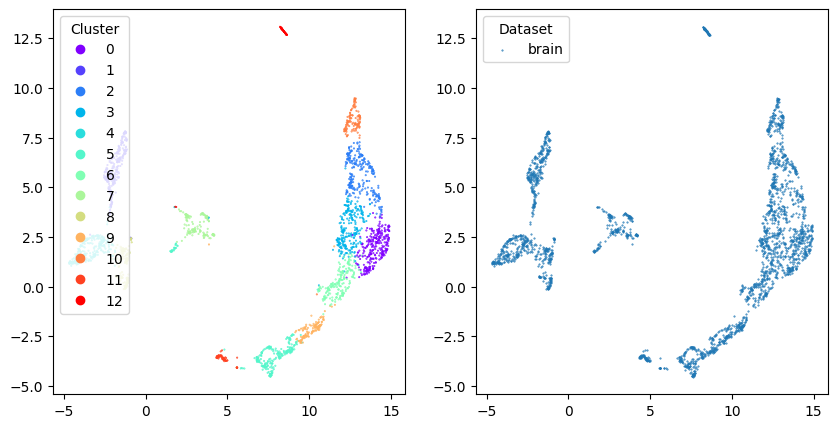

In [ ]:
model.scatter_plot(reduc="UMAP", algo="leiden", resolution=1., s=0.2)

### rs 37

In [ ]:
seed = 37
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

model = Cobolt(dataset=multi_dt, n_latent=20)
model.train(num_epochs=100)
model.calc_all_latent()
latent = model.get_all_latent()
# save latents
np.save(data_prefix+'cobolt_latent_rs37', latent[0])

NameError: ignored

### rs 8790

In [ ]:
seed = 8790
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

model = Cobolt(dataset=multi_dt, lr=1e-3, n_latent=20)
model.train(num_epochs=100)
model.calc_all_latent()
latent = model.get_all_latent()
# save latents
np.save(data_prefix+'cobolt_latent_rs8790', latent[0])

100%|██████████| 100/100 [1:05:57<00:00, 39.58s/it]


## bone marrow

## gastrulation